# Climate DT historical runs: ECmean4 within the AQUA framework 

We need to load the AQUA module to access the Reader and the ECmean `performance_indices` function. 
Configuration files (which tells ECmean4 where output should be written and the mask are) as well as interface file (which defines the Climate DT filename communication between AQUA and ECmean4) should be loaded.

We will run the ECmean code on both IFS-NEMO and ICON `historical-1990` experiment, for which we can get a serious assessment of the model skill.

In [8]:
from aqua import Reader
from ecmean.performance_indices import performance_indices

models = ['IFS-NEMO', 'ICON']
exp = 'historical-1990'
year1 = 1990
year2 = 2001
numproc = 1
interface = '../config/interface_AQUA_destine-v1.yml'
config = '../config/ecmean_config_destine-v1.yml'

*Important*: before proceeding please edit the output directories in `config/config.yaml`, especially if you move from Lumi/Levante to another machine

Now you can load the data from the LRA, looping on the two models and running the performance indices

In [9]:
for model in models: 
    reader = Reader(model=model, exp=exp, source="lra-r100-monthly", fix=False)
    data = reader.retrieve()
    performance_indices(exp, year1, year2, numproc = numproc, config = config, model = model, 
            interface = interface, loglevel = 'warning', xdataset = data)

2024-04-11 15:21:33 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi
2024-04-11 15:22:20 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...


Welcome to ECmean4 v0.1.8: Running performance_indices with 1 cores!


2024-04-11 15:23:31 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi


ECmean4 Performance Indices succesfully computed!


/work/bb1153/b382076/mambaforge/envs/aqua/lib/python3.12/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 72
  result = blockwise(
/work/bb1153/b382076/mambaforge/envs/aqua/lib/python3.12/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 72
  result = blockwise(
2024-04-11 15:23:55 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...


Welcome to ECmean4 v0.1.8: Running performance_indices with 1 cores!


2024-04-11 15:24:40 | ecmean.libs.files |  WARNING -> Variable net_sfc requires msr which is not available in the model output. Ignoring it.
2024-04-11 15:24:43 | ecmean.libs.files |  WARNING -> Variable tauu requires metss which is not available in the model output. Ignoring it.
2024-04-11 15:24:43 | ecmean.libs.files |  WARNING -> Variable tauv requires mntss which is not available in the model output. Ignoring it.


ECmean4 Performance Indices succesfully computed!


To visualize the output within the notebook we need to use an extra package, which is Wand. Remember to install it through `mamba install imagemagick` and `pip install wand` if you want to visualize the output.
Otherwise you can simply check the plots in the path below

In [10]:
from wand.image import Image as WImage
datadir='/work/bb1153/b382076/ecmean_new/output/PDF'
img_icon = WImage(filename=f'{datadir}/PI4_EC23_{exp}_ICON_r1i1p1f1_{year1}_{year2}.pdf')
img_ifs = WImage(filename=f'{datadir}/PI4_EC23_{exp}_IFS-NEMO_r1i1p1f1_{year1}_{year2}.pdf')

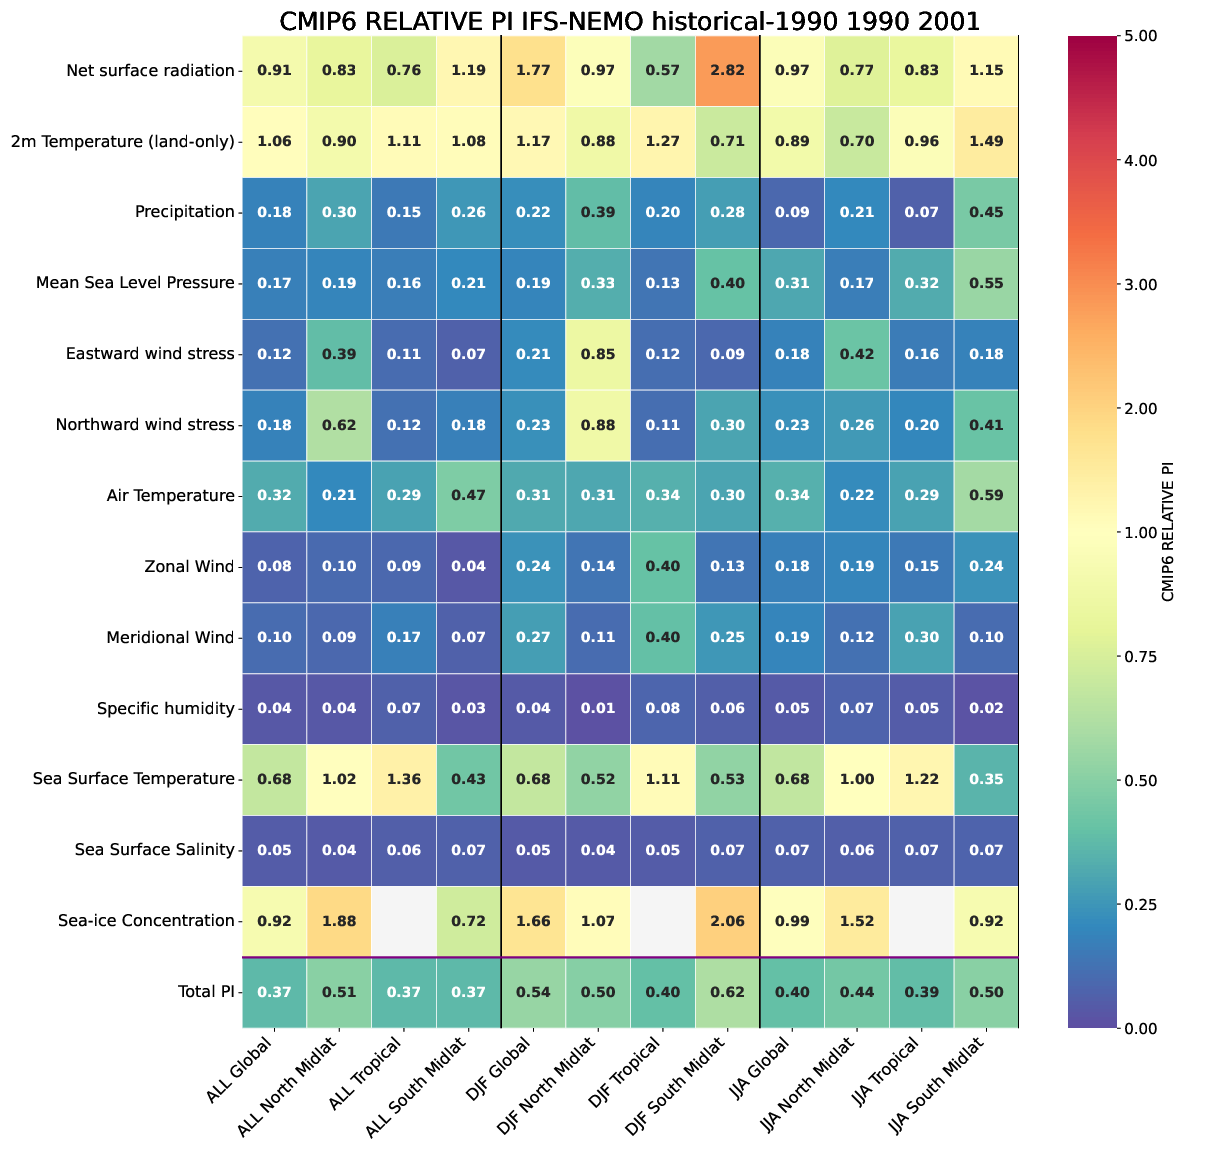

In [11]:
img_ifs

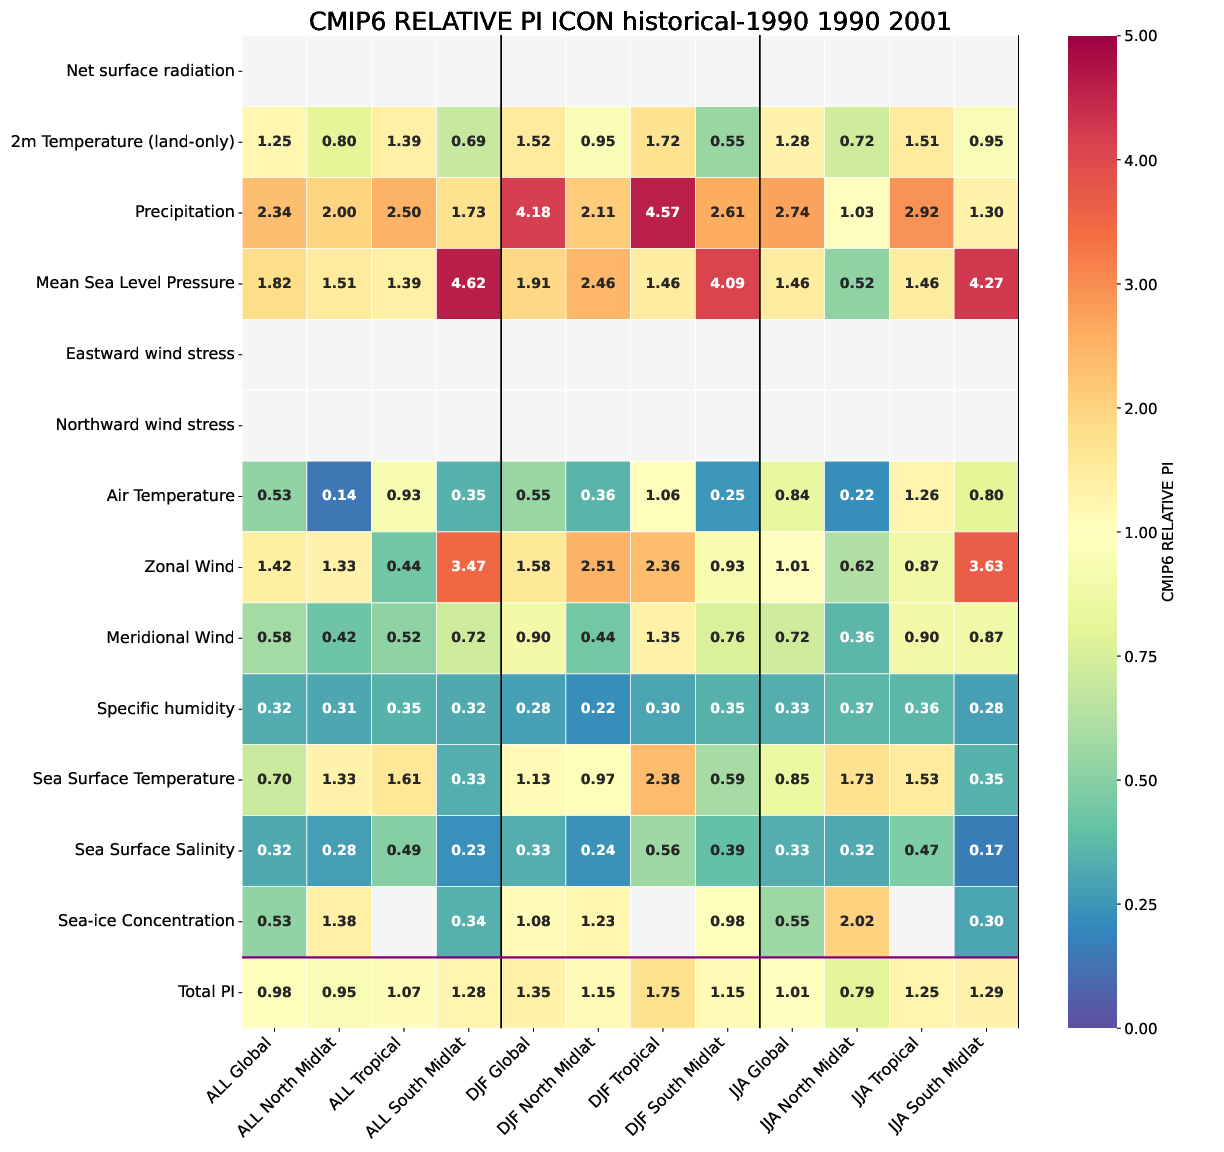

In [12]:
img_icon